In [70]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [124]:
data = pd.read_csv('webtraffic_2017.csv', delimiter=";")

In [125]:
data.head()

,Datum,Wochentag,PIs - Desktop,Visits - Desktop,PIs - Mobile,Visits - Mobile,PIs - Apps,Visits - Apps
0,01.01.2017,7,899725,267823,954873,298785,7821276,832812
1,02.01.2017,1,1562139,520331,1039444,349598,7952041,823304
2,03.01.2017,2,1220514,354873,815502,240724,6443534,780176
3,04.01.2017,3,1208288,310788,705192,195672,6094247,732382
4,05.01.2017,4,1465230,291635,898840,200158,6629143,705464


In [126]:
data = data.set_index('Datum')
data.head()

,Wochentag,PIs - Desktop,Visits - Desktop,PIs - Mobile,Visits - Mobile,PIs - Apps,Visits - Apps
Datum,,,,,,,
01.01.2017,7,899725,267823,954873,298785,7821276,832812
02.01.2017,1,1562139,520331,1039444,349598,7952041,823304
03.01.2017,2,1220514,354873,815502,240724,6443534,780176
04.01.2017,3,1208288,310788,705192,195672,6094247,732382
05.01.2017,4,1465230,291635,898840,200158,6629143,705464


In [127]:
desktop = data[['PIs - Desktop', 'Visits - Desktop']]

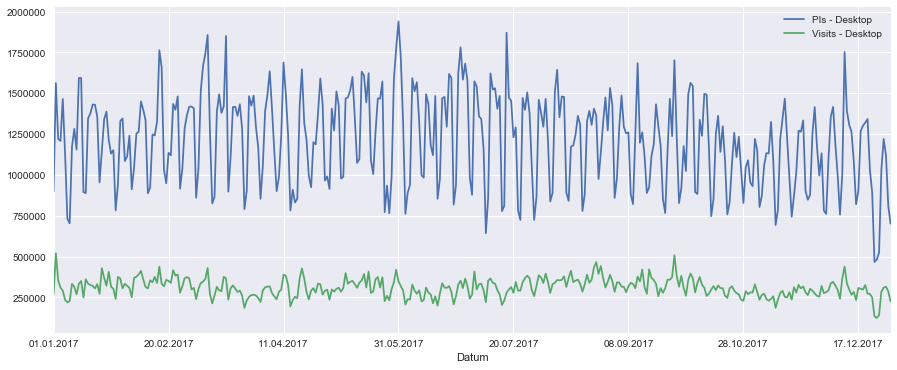

In [128]:
desktop.plot()

In [129]:
mobile = data[['PIs - Mobile', 'Visits - Mobile']]

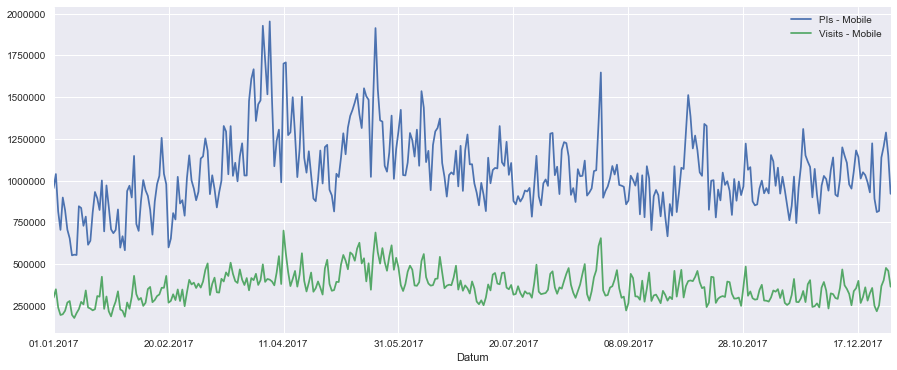

In [130]:
mobile.plot()

In [131]:
apps = data[['PIs - Apps', 'Visits - Apps']]

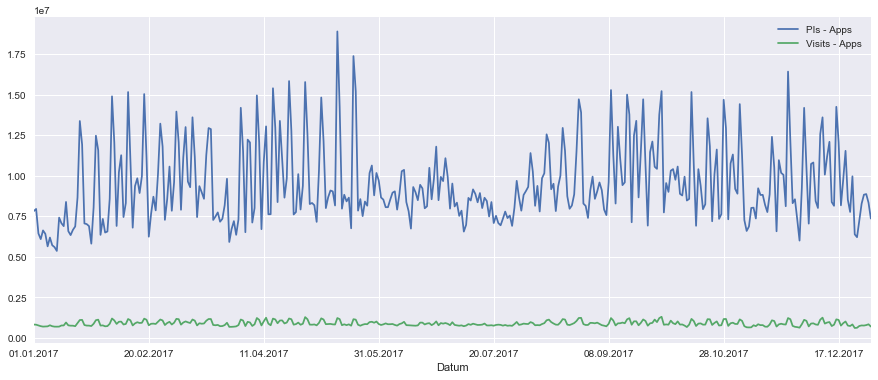

In [132]:
apps.plot()

Data from all three sources is stationary, so we don't need to make it stationary

In [133]:
data.corr()

,Wochentag,PIs - Desktop,Visits - Desktop,PIs - Mobile,Visits - Mobile,PIs - Apps,Visits - Apps
Wochentag,1.000000,-0.592768,-0.284076,0.166045,0.315244,0.471135,0.536637
PIs - Desktop,-0.592768,1.000000,0.579272,0.199515,0.006571,-0.242590,-0.303952
Visits - Desktop,-0.284076,0.579272,1.000000,0.029191,0.156465,0.060620,0.166390
PIs - Mobile,0.166045,0.199515,0.029191,1.000000,0.748460,0.322895,0.242686
Visits - Mobile,0.315244,0.006571,0.156465,0.748460,1.000000,0.459451,0.509107
PIs - Apps,0.471135,-0.242590,0.060620,0.322895,0.459451,1.000000,0.915031
Visits - Apps,0.536637,-0.303952,0.166390,0.242686,0.509107,0.915031,1.000000


In [152]:
def heatMap(data):
    #Create Correlation df
    corr = data.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 15))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\palettes.py:725: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


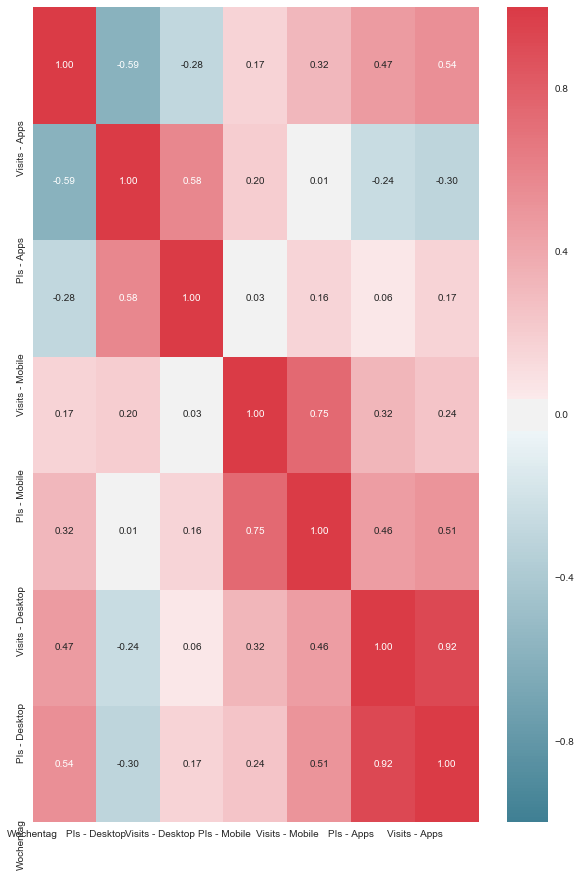

In [153]:
heatMap(data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


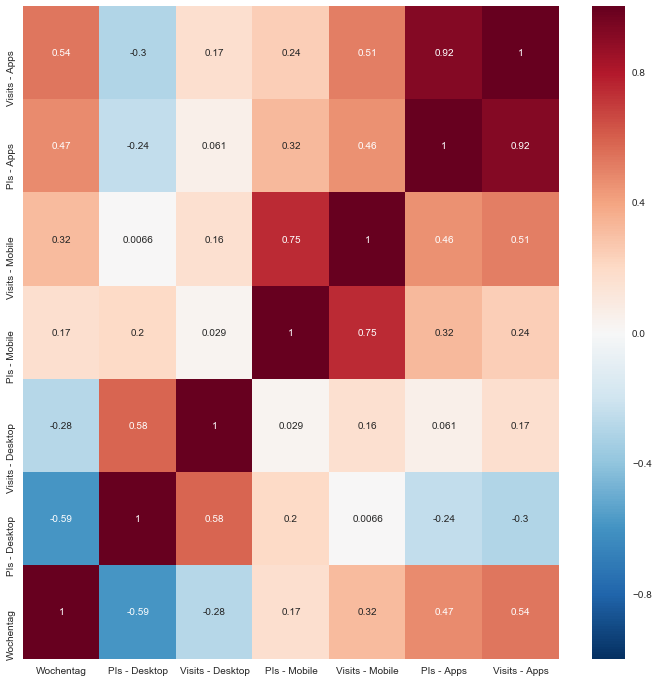

In [156]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(),
 vmax=1, vmin=-1,annot=True, ax=ax);
ax.invert_yaxis()

In [157]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(desktop, order=(1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(desktop), len(ddesktop), typ='levels')
print(yhat)

ValueError: Given a pandas object and the index does not contain dates

In [158]:
from statsmodels.tsa.arima_model import ARIMA
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

[ 100.55542211]


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\utils.py:99: DeprecationWarning: `ss` is deprecated!
scipy.stats.ss is deprecated in scipy 0.17.0
  warnings.warn(depdoc, DeprecationWarning)


In [160]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = desktop['PIs - Desktop']
# fit model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

ModuleNotFoundError: No module named 'statsmodels.tsa.statespace'

In [163]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

ImportError: cannot import name 'ValueWarning'